<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-данных-и-задач" data-toc-modified-id="Описание-данных-и-задач-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание данных и задач</a></span></li><li><span><a href="#Загрузка-данных-и-библиотек" data-toc-modified-id="Загрузка-данных-и-библиотек-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка данных и библиотек</a></span></li><li><span><a href="#Modelling" data-toc-modified-id="Modelling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modelling</a></span><ul class="toc-item"><li><span><a href="#Data-preparation" data-toc-modified-id="Data-preparation-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Data preparation</a></span></li><li><span><a href="#Разбиение-данных-на-train/test-и-масштабирование" data-toc-modified-id="Разбиение-данных-на-train/test-и-масштабирование-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Разбиение данных на train/test и масштабирование</a></span></li><li><span><a href="#LinearRegression-Baseline" data-toc-modified-id="LinearRegression-Baseline-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>LinearRegression Baseline</a></span><ul class="toc-item"><li><span><a href="#Проверка-на-переобучение-линейной-регрессии" data-toc-modified-id="Проверка-на-переобучение-линейной-регрессии-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Проверка на переобучение линейной регрессии</a></span></li></ul></li><li><span><a href="#RandomForest-Baseline" data-toc-modified-id="RandomForest-Baseline-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>RandomForest Baseline</a></span><ul class="toc-item"><li><span><a href="#Проверка-на-переобучение-случайного-леса" data-toc-modified-id="Проверка-на-переобучение-случайного-леса-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>Проверка на переобучение случайного леса</a></span></li></ul></li><li><span><a href="#Catboost-Baseline" data-toc-modified-id="Catboost-Baseline-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Catboost Baseline</a></span><ul class="toc-item"><li><span><a href="#Разбиение-для-бустинга" data-toc-modified-id="Разбиение-для-бустинга-3.5.1"><span class="toc-item-num">3.5.1&nbsp;&nbsp;</span>Разбиение для бустинга</a></span></li><li><span><a href="#Обучени-и-предсказание" data-toc-modified-id="Обучени-и-предсказание-3.5.2"><span class="toc-item-num">3.5.2&nbsp;&nbsp;</span>Обучени и предсказание</a></span></li><li><span><a href="#Проверка-на-переобучение-catboost" data-toc-modified-id="Проверка-на-переобучение-catboost-3.5.3"><span class="toc-item-num">3.5.3&nbsp;&nbsp;</span>Проверка на переобучение catboost</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Tuning" data-toc-modified-id="Tuning-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Tuning</a></span><ul class="toc-item"><li><span><a href="#Optuna" data-toc-modified-id="Optuna-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Optuna</a></span></li><li><span><a href="#RandomSearch" data-toc-modified-id="RandomSearch-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>RandomSearch</a></span></li></ul></li><li><span><a href="#Feature-importance" data-toc-modified-id="Feature-importance-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Feature importance</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li></ul></div>

# Описание данных и задач

**Имеется датасет**

- `product` — название продукта (эстус, эльфийская пыльца, целебные травы)
- `place` —  город продажи
- `own_price` — цена одной унции продукта в золотых (в среднем за день)
- `competitors_mean_price` — средняя цена продукта по конкурентам за определённый товар в определённом городе
- `date` — дата наблюдения
- `rain` — был ли дождь в это время в этом месте
- `hot` — была ли непереносимая жара в это время в этом месте
- `snow` — был ли снег в это время в этом месте
- `Целевой признак amount` —  объем проданного товара в унциях.
- `month_name` — месяц
- `day_of_week_name` — день
- `profit` — прибыль за день

**Задачи:**

1) Обучить модель предсказывать спрос по данным

2) Определить лучшую модель и проверить на переобучение

3) Протюнинговать модель

4) Сохранить модель с лучшими параметрами для дальнейшего прогнозирования

# Загрузка данных и библиотек

In [33]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler

from src.metrics.get_metrics import get_metrics_regression, mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor

import shap
from sklearn.inspection import permutation_importance

import optuna

import warnings

warnings.filterwarnings("ignore")

RAND = 10

In [34]:
df = pd.read_csv(
    r'C:\Users\Tortik\Desktop\gpn\data\merged\merged_clean_df.csv',
    parse_dates=['date'])

In [35]:
df

,place,product,date,own_price,amount,competitors_mean_price,cost,hot,rain,snow,month_name,day_of_week_name,profit
0,Анор Лондо,Целебные травы,2216-01-02,3.900000,43.099110,4.21,2.07,1,0,0,January,Tuesday,78.871372
1,Анор Лондо,Целебные травы,2216-01-03,3.900000,51.883852,4.05,2.07,1,0,0,January,Wednesday,94.947449
2,Анор Лондо,Целебные травы,2216-01-04,3.900000,41.252214,3.98,2.07,0,0,0,January,Thursday,75.491551
3,Анор Лондо,Целебные травы,2216-01-05,3.900000,40.699561,3.90,2.07,0,0,0,January,Friday,74.480197
4,Анор Лондо,Целебные травы,2216-01-06,3.900000,53.619643,3.98,2.07,0,0,1,January,Saturday,98.123947
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14993,Фалькония,Эстус,2218-09-23,9.203797,63.829054,14.69,3.26,0,1,0,September,Wednesday,379.386972
14994,Фалькония,Эстус,2218-09-24,9.075932,53.791792,15.02,7.29,0,0,0,September,Thursday,96.068493
14995,Фалькония,Эстус,2218-09-25,9.200789,64.553555,14.76,7.29,0,0,1,September,Friday,123.348254
14996,Фалькония,Эстус,2218-09-26,9.010448,59.959888,14.84,7.29,0,0,1,September,Saturday,103.157855


- *Хоть цена и должна записываться до сотых, но из-за того, что мы взяли среднюю за день она выходит за эти рамки*
- *Стоит оставить для обучения модели эти значения, чтобы их усреднение максимально точно соответсвовало спросу за день, а в момент составления расписания следовать предписанным правилам*
- *Инфляция должна учитываться моделью, посредством возрастания издержек, но если метрики будут плохие, стоит добавить дополнительный признак*

- *После EDA можно спокойно удалять признак дня недели. Также стоит удалить признак прибыли, т.к. надо посчитать, а не предсказать*

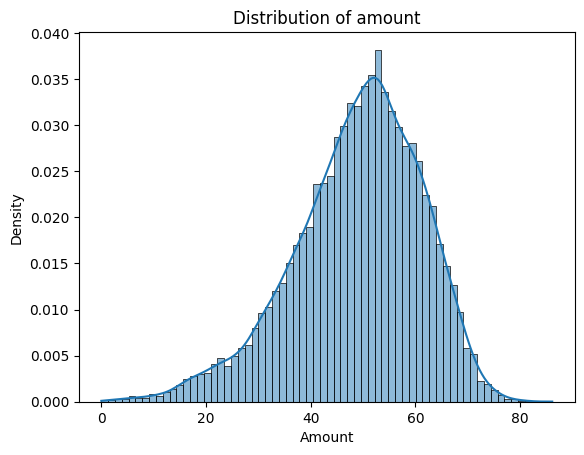

In [36]:
sns.histplot(df['amount'], kde=True, stat='density')
plt.title('Distribution of amount')
plt.xlabel('Amount')
plt.ylabel('Density')
plt.show()

In [37]:
if stats.shapiro(df['amount']).pvalue >= 0.05:
    print('Распределение нормальное')
else:
    print('Распределение не нормальное\n')

print(stats.shapiro(df['amount']))

Распределение не нормальное

ShapiroResult(statistic=0.9800172448158264, pvalue=4.033917889251851e-41)


- *У распределения есть явные выбросы, в качестве функции потерь будем использовать MAE, т.к. она достаточно устойчива к выбросам*

# Modelling

## Data preparation

In [38]:
def check_overfitting(model, X_train, y_train, X_test, y_test,
                      metric_fun) -> None:
    """
    Проверка на переобучение для регрессионных моделей.

    Parameters:
    - model (RegressorMixin): Регрессионная модель для оценки.
    - X_train: Обучающие входные данные.
    - y_train: Истинные значения для обучающих данных.
    - X_test: Тестовые входные данные.
    - y_test: Истинные значения для тестовых данных.
    - metric_fun (Callable): Метрика для оценки производительности модели.

    Returns:
    - None: Выводит результаты оценки.
    """
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    value_train = metric_fun(y_train, y_pred_train)
    value_test = metric_fun(y_test, y_pred_test)

    print(f'{metric_fun.__name__} train: %.3f' % value_train)
    print(f'{metric_fun.__name__} test: %.3f' % value_test)
    print(f'delta = {(abs(value_train - value_test)/value_test*100):.1f} %')

In [39]:
df = df.drop(columns=['profit', 'day_of_week_name'], axis=1)

In [40]:
# Добавим признак того, выше ли наша цена, чем у конкурентов
df['price_comparison'] = np.where(
    df['own_price'] > df['competitors_mean_price'], 'Higher', 'Lower')

In [41]:
# Добавим признак сезонности
df['season'] = pd.to_datetime(df['date']).dt.month.map({
    1: 'Winter',
    2: 'Winter',
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Fall',
    10: 'Fall',
    11: 'Fall',
    12: 'Winter'
})

In [42]:
df

,place,product,date,own_price,amount,competitors_mean_price,cost,hot,rain,snow,month_name,price_comparison,season
0,Анор Лондо,Целебные травы,2216-01-02,3.900000,43.099110,4.21,2.07,1,0,0,January,Lower,Winter
1,Анор Лондо,Целебные травы,2216-01-03,3.900000,51.883852,4.05,2.07,1,0,0,January,Lower,Winter
2,Анор Лондо,Целебные травы,2216-01-04,3.900000,41.252214,3.98,2.07,0,0,0,January,Lower,Winter
3,Анор Лондо,Целебные травы,2216-01-05,3.900000,40.699561,3.90,2.07,0,0,0,January,Lower,Winter
4,Анор Лондо,Целебные травы,2216-01-06,3.900000,53.619643,3.98,2.07,0,0,1,January,Lower,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14993,Фалькония,Эстус,2218-09-23,9.203797,63.829054,14.69,3.26,0,1,0,September,Lower,Fall
14994,Фалькония,Эстус,2218-09-24,9.075932,53.791792,15.02,7.29,0,0,0,September,Lower,Fall
14995,Фалькония,Эстус,2218-09-25,9.200789,64.553555,14.76,7.29,0,0,1,September,Lower,Fall
14996,Фалькония,Эстус,2218-09-26,9.010448,59.959888,14.84,7.29,0,0,1,September,Lower,Fall


In [43]:
# преобразуем в категориальные признаки для CatBoost
cols = df.select_dtypes('object').columns
df[cols] = df[cols].astype("category")
df_cat = df.copy()
df_cat = df_cat[[col for col in df_cat if col != 'own_price'] + ['own_price']]

In [44]:
# поменяем названия для упрощения предсказания
# т.к. CatBoost запоминает кат признаки по индексам
df_cat = df_cat[[col for col in df_cat if col != 'price_comparison'] + ['price_comparison']]

In [45]:
df_cat

,place,product,date,amount,competitors_mean_price,cost,hot,rain,snow,month_name,season,own_price,price_comparison
0,Анор Лондо,Целебные травы,2216-01-02,43.099110,4.21,2.07,1,0,0,January,Winter,3.900000,Lower
1,Анор Лондо,Целебные травы,2216-01-03,51.883852,4.05,2.07,1,0,0,January,Winter,3.900000,Lower
2,Анор Лондо,Целебные травы,2216-01-04,41.252214,3.98,2.07,0,0,0,January,Winter,3.900000,Lower
3,Анор Лондо,Целебные травы,2216-01-05,40.699561,3.90,2.07,0,0,0,January,Winter,3.900000,Lower
4,Анор Лондо,Целебные травы,2216-01-06,53.619643,3.98,2.07,0,0,1,January,Winter,3.900000,Lower
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14993,Фалькония,Эстус,2218-09-23,63.829054,14.69,3.26,0,1,0,September,Fall,9.203797,Lower
14994,Фалькония,Эстус,2218-09-24,53.791792,15.02,7.29,0,0,0,September,Fall,9.075932,Lower
14995,Фалькония,Эстус,2218-09-25,64.553555,14.76,7.29,0,0,1,September,Fall,9.200789,Lower
14996,Фалькония,Эстус,2218-09-26,59.959888,14.84,7.29,0,0,1,September,Fall,9.010448,Lower


In [46]:
df_label = pd.get_dummies(df, drop_first=True)

In [47]:
df_label

,date,own_price,amount,competitors_mean_price,cost,hot,rain,snow,place_Врата Балдура,place_Кеджистан,...,month_name_June,month_name_March,month_name_May,month_name_November,month_name_October,month_name_September,price_comparison_Lower,season_Spring,season_Summer,season_Winter
0,2216-01-02,3.900000,43.099110,4.21,2.07,1,0,0,False,False,...,False,False,False,False,False,False,True,False,False,True
1,2216-01-03,3.900000,51.883852,4.05,2.07,1,0,0,False,False,...,False,False,False,False,False,False,True,False,False,True
2,2216-01-04,3.900000,41.252214,3.98,2.07,0,0,0,False,False,...,False,False,False,False,False,False,True,False,False,True
3,2216-01-05,3.900000,40.699561,3.90,2.07,0,0,0,False,False,...,False,False,False,False,False,False,True,False,False,True
4,2216-01-06,3.900000,53.619643,3.98,2.07,0,0,1,False,False,...,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14993,2218-09-23,9.203797,63.829054,14.69,3.26,0,1,0,False,False,...,False,False,False,False,False,True,True,False,False,False
14994,2218-09-24,9.075932,53.791792,15.02,7.29,0,0,0,False,False,...,False,False,False,False,False,True,True,False,False,False
14995,2218-09-25,9.200789,64.553555,14.76,7.29,0,0,1,False,False,...,False,False,False,False,False,True,True,False,False,False
14996,2218-09-26,9.010448,59.959888,14.84,7.29,0,0,1,False,False,...,False,False,False,False,False,True,True,False,False,False


## Разбиение данных на train/test и масштабирование

In [48]:
X = df_label.drop(columns=['date', 'amount'], axis=1)
y = df_label['amount']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=RAND)
st = StandardScaler()
X_train_std = st.fit_transform(X_train)
X_test_std = st.transform(X_test)

## LinearRegression Baseline

In [49]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [50]:
y_pred = model_lr.predict(X_test)

metrics = get_metrics_regression(y_test, y_pred, X_test,
                                 'LinearRegression_Baseline')
metrics

,model,MAE,MSE,RMSE,RMSLE,R2 adjusted,MPE_%,MAPE_%,WAPE_%
0,LinearRegression_Baseline,6.8554,75.642679,8.69728,0.224366,0.481957,-6.227897,18.158047,14.035545


### Проверка на переобучение линейной регрессии

In [51]:
check_overfitting(model_lr, X_train, y_train, X_test, y_test,
                  mean_absolute_error)

mean_absolute_error train: 6.793
mean_absolute_error test: 6.855
delta = 0.9 %


*Модель не переобучена*

## RandomForest Baseline

In [52]:
model_rf = RandomForestRegressor(random_state=RAND)
model_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=10)

In [53]:
y_pred = model_rf.predict(X_test)

metrics = pd.concat([
    metrics,
    get_metrics_regression(y_test, y_pred, X_test, 'RandomForest_Baseline')
])

metrics

,model,MAE,MSE,RMSE,RMSLE,R2 adjusted,MPE_%,MAPE_%,WAPE_%
0,LinearRegression_Baseline,6.855400,75.642679,8.69728,0.224366,0.481957,-6.227897,18.158047,14.035545
0,RandomForest_Baseline,4.230295,28.586340,5.34662,0.127965,0.804225,-2.371309,9.975709,8.660983


### Проверка на переобучение случайного леса

In [54]:
check_overfitting(model_rf, X_train, y_train, X_test, y_test,
                  mean_absolute_error)

mean_absolute_error train: 1.613
mean_absolute_error test: 4.230
delta = 61.9 %


*Модель сильно переобучена*

## Catboost Baseline
### Разбиение для бустинга

In [55]:
X = df_cat.drop(['amount', 'date'], axis=1)
y = df_cat['amount']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=RAND)

X_train_, X_val, y_train_, y_val = train_test_split(X_train,
                                                    y_train,
                                                    test_size=0.16,
                                                    random_state=RAND)

### Обучени и предсказание

In [56]:
cat_features = X_val.select_dtypes('category').columns.tolist()
cat_features[-2], cat_features[-1] = cat_features[-1], cat_features[-2]

catb = CatBoostRegressor(random_state=RAND,
                         eval_metric="MAE",
                         cat_features=cat_features)
eval_set = [(X_val, y_val)]

catb.fit(X_train_,
         y_train_,
         eval_set=eval_set,
         verbose=False,
         early_stopping_rounds=100)

In [57]:
y_pred = catb.predict(X_test)

metrics = pd.concat([
    metrics,
    get_metrics_regression(y_test, y_pred, X_test, 'CatBoost_Baseline')
])

metrics

,model,MAE,MSE,RMSE,RMSLE,R2 adjusted,MPE_%,MAPE_%,WAPE_%
0,LinearRegression_Baseline,6.855400,75.642679,8.697280,0.224366,0.481957,-6.227897,18.158047,14.035545
0,RandomForest_Baseline,4.230295,28.586340,5.346620,0.127965,0.804225,-2.371309,9.975709,8.660983
0,CatBoost_Baseline,4.121807,27.128009,5.208456,0.129653,0.815207,-2.771994,9.997309,8.438867


### Проверка на переобучение catboost

In [58]:
check_overfitting(catb, X_train_, y_train_, X_test, y_test,
                  mean_absolute_error)

mean_absolute_error train: 3.794
mean_absolute_error test: 4.122
delta = 7.9 %


- *Переобучения практически нет, стоит попробовать через тюнинг улучшить метрики и убрать переобучение*

## Выводы

- Наилучшей, хоть и с небольшим отрывом, моделью оказался градиентый бустинг, её и стоит выбрать, т.к. она не сильно переобучена и показала лучшие метрики на бейзлайне
- Следует проверить модель на переобучение и дотюнить модель для более точного определения спроса
- Из-за того, что в предсказаниях признаков по временным рядам тоже будет содержаться ошибка стоит максимально возможно её минимизировать в модели предсказания спроса.

# Tuning

## Optuna
Для того, чтобы минимизировать MAE подберём гиперпараметры с помощью Optuna
Также внутри функции применим кросс-валидацию позволяет, получить более устойчивую и объективную оценку качества модели, особенно когда у нас ограниченное количество данных, при этом избегая переобучения.

**Сначала рассмотрим оптимальное число деревьев и learning rate**

Скриншоты:

................................................
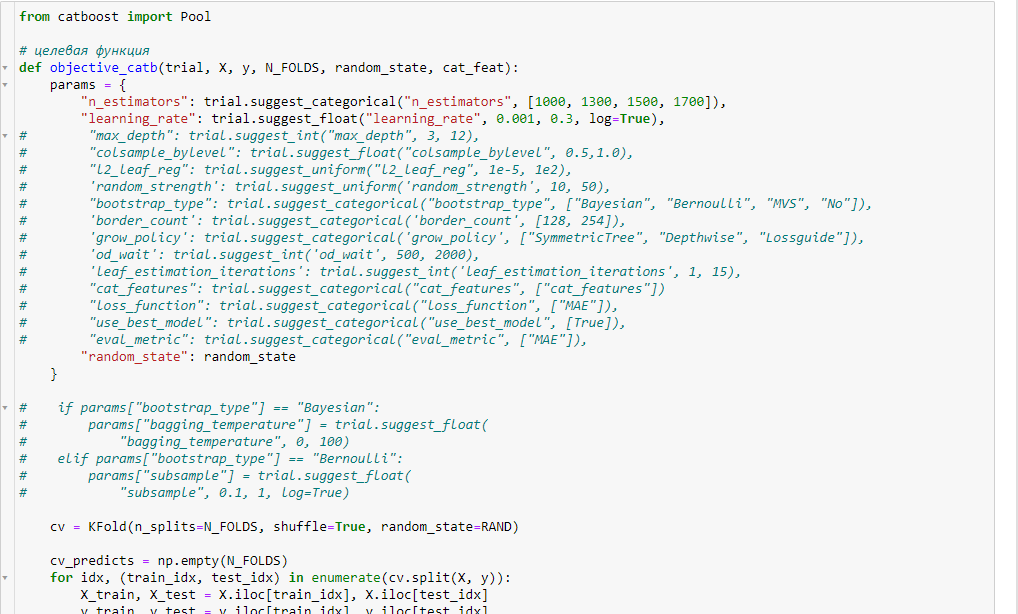
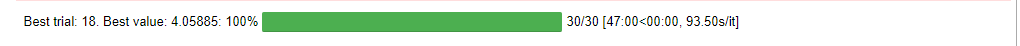

.................................................
Подставляем лучшие результаты и определяем другие гиперпараметры

In [25]:
from catboost import Pool


# целевая функция
def objective_catb(trial, X, y, N_FOLDS, random_state, cat_feat):
    params = {
        "n_estimators":
        trial.suggest_categorical("n_estimators", [1500]),
        "learning_rate":
        trial.suggest_categorical("learning_rate", [0.15896894013244214]),
        "max_depth":
        trial.suggest_int("max_depth", 3, 12),
        "colsample_bylevel":
        trial.suggest_float("colsample_bylevel", 0.5, 1.0),
        "l2_leaf_reg":
        trial.suggest_uniform("l2_leaf_reg", 1e-5, 1e2),
        'random_strength':
        trial.suggest_uniform('random_strength', 10, 50),
        "bootstrap_type":
        trial.suggest_categorical("bootstrap_type",
                                  ["Bayesian", "Bernoulli", "MVS", "No"]),
        'border_count':
        trial.suggest_categorical('border_count', [128, 254]),
        'grow_policy':
        trial.suggest_categorical('grow_policy',
                                  ["SymmetricTree", "Depthwise", "Lossguide"]),
        'od_wait':
        trial.suggest_int('od_wait', 500, 2000),
        'leaf_estimation_iterations':
        trial.suggest_int('leaf_estimation_iterations', 1, 15),
        "loss_function":
        trial.suggest_categorical("loss_function", ["MAE"]),
        "use_best_model":
        trial.suggest_categorical("use_best_model", [True]),
        "eval_metric":
        trial.suggest_categorical("eval_metric", ["MAE"]),
        "random_state":
        random_state
    }

    if params["bootstrap_type"] == "Bayesian":
        params["bagging_temperature"] = trial.suggest_float(
            "bagging_temperature", 0, 100)
    elif params["bootstrap_type"] == "Bernoulli":
        params["subsample"] = trial.suggest_float("subsample",
                                                  0.1,
                                                  1,
                                                  log=True)

    cv = KFold(n_splits=N_FOLDS, shuffle=True, random_state=RAND)

    cv_predicts = np.empty(N_FOLDS)
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        train_data = Pool(data=X_train,
                          label=y_train,
                          cat_features=cat_features)
        eval_data = Pool(data=X_test, label=y_test, cat_features=cat_features)

        model = CatBoostRegressor(**params)
        model.fit(train_data,
                  eval_set=eval_data,
                  early_stopping_rounds=100,
                  verbose=0)

        preds = model.predict(X_test)
        cv_predicts[idx] = mean_absolute_error(y_test, preds)

    return np.mean(cv_predicts)

In [ ]:
N_FOLDS = 3

study_cat = optuna.create_study(
    direction="minimize",
    pruner=optuna.pruners.SuccessiveHalvingPruner(),
    study_name="Cat")
func = lambda trial: objective_catb(trial,
                                    X_train,
                                    y_train,
                                    N_FOLDS=N_FOLDS,
                                    random_state=RAND,
                                    cat_feat=cat_features)
study_cat.optimize(func, n_trials=75, show_progress_bar=True)

- *В какой-то момент ядро умерло, поэтому на базе Google colab был проведён пододбор гиперпараметров и вот, какие они получились*

In [ ]:
best_params = {
    'n_estimators': 1500,
    'learning_rate': 0.15896894013244214,
    'max_depth': 8,
    'colsample_bylevel': 0.9441808667412069,
    'l2_leaf_reg': 70.97647857715087,
    'random_strength': 19.14570398058901,
    'bootstrap_type': 'MVS',
    'border_count': 254,
    'grow_policy': 'SymmetricTree',
    'od_wait': 578,
    'leaf_estimation_iterations': 1,
    'loss_function': 'MAE',
    'use_best_model': True,
    'eval_metric': 'MAE'
}

In [27]:
cat_optuna = CatBoostRegressor(
    **{
        'n_estimators': 1500,
        'learning_rate': 0.15896894013244214,
        'max_depth': 9,
        'colsample_bylevel': 0.9636509504655468,
        'l2_leaf_reg': 63.15042154713747,
        'random_strength': 18.381167742844518,
        'bootstrap_type': 'MVS',
        'border_count': 254,
        'grow_policy': 'SymmetricTree',
        'od_wait': 510,
        'leaf_estimation_iterations': 2,
        'loss_function': 'MAE',
        'use_best_model': True,
        'eval_metric': 'MAE'
    })
cat_optuna.fit(X_train_,
               y_train_,
               cat_features=cat_features,
               eval_set=eval_set,
               verbose=False,
               early_stopping_rounds=100)

y_pred = cat_optuna.predict(X_test)

metrics = pd.concat([
    metrics,
    get_metrics_regression(y_test, y_pred, X_test, 'CatBoost_Optuna')
])

round(metrics.set_index('model'), 3)

,MAE,MSE,RMSE,RMSLE,R2 adjusted,MPE_%,MAPE_%,WAPE_%
model,,,,,,,,
LinearRegression_Baseline,6.855,75.643,8.697,0.224,0.482,-6.228,18.158,14.036
RandomForest_Baseline,4.230,28.586,5.347,0.128,0.804,-2.371,9.976,8.661
CatBoost_Baseline,4.117,26.834,5.180,0.128,0.817,-2.815,9.950,8.429
CatBoost_Optuna,4.143,28.092,5.300,0.130,0.809,-1.989,9.891,8.483


In [28]:
check_overfitting(cat_optuna, X_train_, y_train_, X_test, y_test,
                  mean_absolute_error)

mean_absolute_error train: 3.256
mean_absolute_error test: 4.143
delta = 21.4 %


- *Видимо слишком много гиперпараметров для модели, поэтому метрики оказались хуже и модель достаточно переобучега. Пока Бейзлайн для предсказания лучше*
- *Стоит проверить встроенный RandomSearch в Catboost для подбора гипермараметров (лучше взять меньше)*

## RandomSearch

- *Аналогично подбираем кол-во деревьев и learning rate*

In [31]:
grid = {
    "n_estimators": [1700],
    "learning_rate": [0.1],
    "boosting_type": ['Ordered', 'Plain'],
    "max_depth": list(range(3, 12)),
    "l2_leaf_reg": np.logspace(-5, 2, 5),
    "bootstrap_type": ["Bayesian", "Bernoulli", "MVS", "No"],
    'border_count': [128, 254],
    'grow_policy': ["SymmetricTree", "Depthwise", "Lossguide"],
    "random_state": [RAND]
}

model = CatBoostRegressor(loss_function="MAE",
                          eval_metric="MAE",
                          cat_features=cat_features,
                          silent=True)
grid_search_result = model.randomized_search(grid,
                                             X=X_train,
                                             y=y_train,
                                             plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 4.899611102
bestIteration = 1698

0:	loss: 4.8996111	best: 4.8996111 (0)	total: 21.2s	remaining: 3m 10s

bestTest = 4.321551706
bestIteration = 640

1:	loss: 4.3215517	best: 4.3215517 (1)	total: 2m 15s	remaining: 9m 3s

bestTest = 4.612306914
bestIteration = 1699

2:	loss: 4.6123069	best: 4.3215517 (1)	total: 2m 50s	remaining: 6m 36s

bestTest = 4.278193299
bestIteration = 571

3:	loss: 4.2781933	best: 4.2781933 (3)	total: 4m 35s	remaining: 6m 53s

bestTest = 4.207617427
bestIteration = 1697

4:	loss: 4.2076174	best: 4.2076174 (4)	total: 9m 25s	remaining: 9m 25s

bestTest = 4.660411096
bestIteration = 1669

5:	loss: 4.6604111	best: 4.2076174 (4)	total: 9m 53s	remaining: 6m 35s

bestTest = 4.102619409
bestIteration = 1586

6:	loss: 4.1026194	best: 4.1026194 (6)	total: 11m 16s	remaining: 4m 49s
Estimating final quality...
Training on fold [0/3]

bestTest = 4.225696143
bestIteration = 1698

Training on fold [1/3]

bestTest = 4.249503909
bestIteration = 1692

Training on fold [

In [32]:
grid_search_result['params']

{'border_count': 254,
 'random_seed': 10,
 'depth': 9,
 'iterations': 1700,
 'learning_rate': 0.1,
 'l2_leaf_reg': 100.0,
 'grow_policy': 'SymmetricTree',
 'boosting_type': 'Plain',
 'bootstrap_type': 'MVS'}

In [33]:
cat_grid = CatBoostRegressor(**grid_search_result['params'],
                             loss_function='MAE',
                             eval_metric='MAE')
cat_grid.fit(X_train_,
             y_train_,
             cat_features=cat_features,
             eval_set=eval_set,
             verbose=False,
             early_stopping_rounds=100)

y_pred = cat_grid.predict(X_test)

metrics = pd.concat([
    metrics,
    get_metrics_regression(y_test, y_pred, X_test, 'CatBoost_RandGrid')
])

round(metrics.set_index('model'), 3)

,MAE,MSE,RMSE,RMSLE,R2 adjusted,MPE_%,MAPE_%,WAPE_%
model,,,,,,,,
LinearRegression_Baseline,6.855,75.643,8.697,0.224,0.482,-6.228,18.158,14.036
RandomForest_Baseline,4.230,28.586,5.347,0.128,0.804,-2.371,9.976,8.661
CatBoost_Baseline,4.117,26.834,5.180,0.128,0.817,-2.815,9.950,8.429
CatBoost_Optuna,4.143,28.092,5.300,0.130,0.809,-1.989,9.891,8.483
CatBoost_RandGrid,4.108,27.558,5.250,0.130,0.812,-2.134,9.871,8.412


In [34]:
check_overfitting(cat_grid, X_train_, y_train_, X_test, y_test,
                  mean_absolute_error)

mean_absolute_error train: 3.150
mean_absolute_error test: 4.108
delta = 23.3 %


- *Хоть метрики немного и улучшились всё равно, лучше использовать бейзлан, из-за достаточно сильного переобучения моделей с гиперпараметрами*

# Feature importance

In [111]:
# метод sklearn
r = permutation_importance(catb,
                           X_test,
                           y_test,
                           n_repeats=4,
                           random_state=RAND)

<Axes: xlabel='value', ylabel='column'>

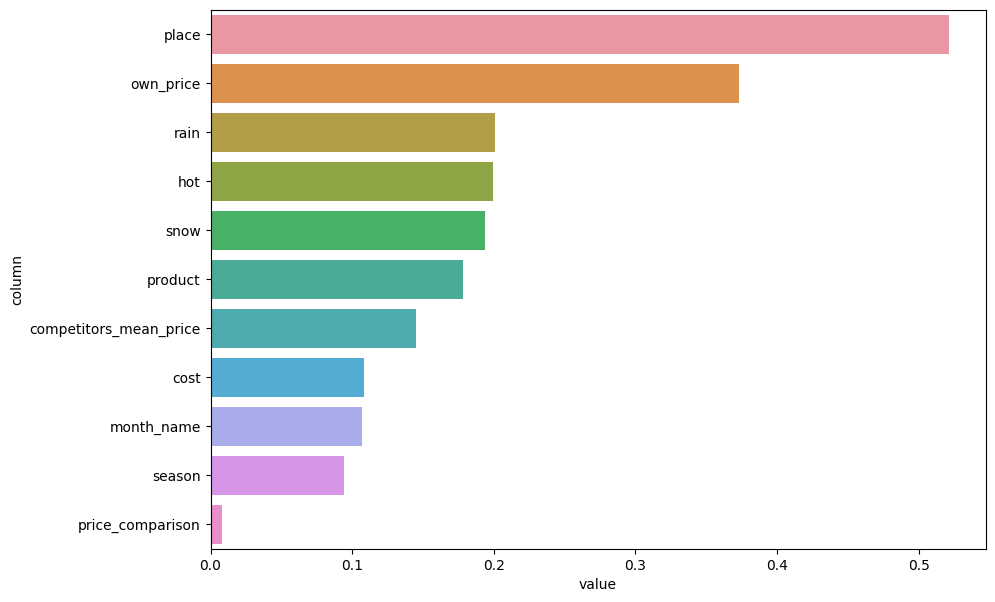

In [112]:
feature_imp = pd.DataFrame()
feature_imp['column'] = X_test.columns
feature_imp['value'] = r['importances_mean']
feature_imp['2_std'] = 2 * r['importances_std']

feature_imp.sort_values(by='value', inplace=True, ascending=False)

plt.figure(figsize=(10, 7))
sns.barplot(data=feature_imp[:15], x='value', y='column')

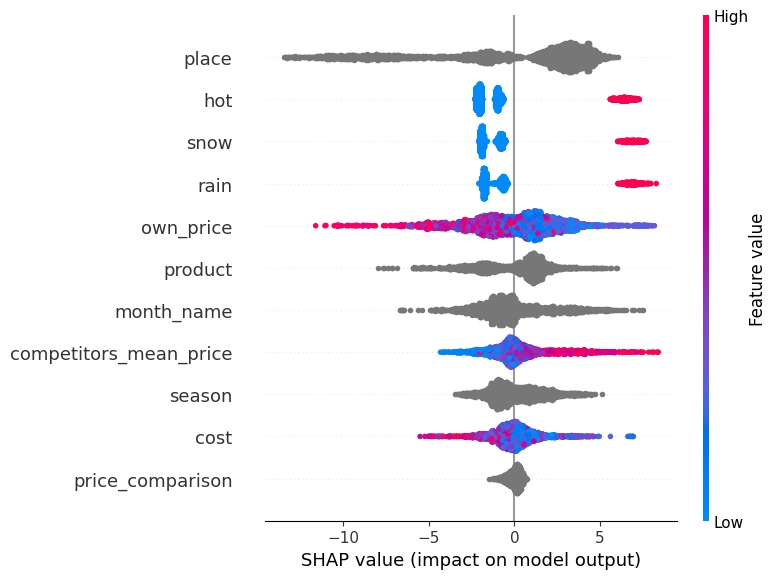

In [41]:
# метод shap
explainer = shap.TreeExplainer(catb)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)

**Сохраним лучшую модель**

In [59]:
catb.save_model('C:/Users/Tortik/Desktop/gpn/model/model_catb.cb')

## Выводы

- Наибольшее влияние на спрос оказывает город
- На втором месте идёт цена, при чём, что логично, чем она больше, тем спрос меньше
- При наличии любого вида погоды спрос достаточно сильно возрастает
- Ну и также логично, что, чем больше цена у конкурентов, тем спрос больше у нас
- В целом по влиянию признаков и их влиянию на модеь видно, что модель работает правильно, без сбоев и нелогичных решений